In [1]:
import pandas as pd
import geopandas as gpd

In [18]:
eurospores_links = pd.read_excel('../data/eurospores.xlsx', sheet_name='links_internal')
eurospores_codes = pd.read_excel('../data/eurospores.xlsx', sheet_name='locations', index_col=0)['EuroSPORES'].drop_duplicates()
eurospores_links = eurospores_links.replace(eurospores_codes.drop_duplicates().index.str.lower(), eurospores_codes.drop_duplicates().values)
eurospores_links = eurospores_links.set_index(['Link_from', 'Link_to'])[["('GTC', 'AC')", "('GTC', 'DC')"]]

In [20]:
transmission_costs = pd.read_csv('/Users/brynmorp/Dropbox/Collaboration - Francesco Bryn Stefan/Euro-SPORES paper/Transmission/transmission_costs.csv', delimiter=';').set_index(['Primary Country',  'Second Country'])

In [24]:
transmission_costs.loc[('Portugal', 'Spain')]#, 'Project name']

/Users/brynmorp/miniconda3/envs/euro-spores/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,Project name,Inland_subsea,Terrain multiplier,Technology,detailed Macro_category,Macro_cat,Voltage (kV),Circuit type,Current,Length,CAPEX (MEur),NTC increase (MW),Cost per cap (Eur/kW),Cost per MWkm (Eur/MWkm)
Primary Country,Second Country,,,,,,,,,,,,,,
Portugal,Spain,4,Inland,1,OHL+substations,OHL,OHL,400,NaN,NaN,170.2,111.94,1450,77.2,453.584019


In [45]:
transmission_costs.filter(regex='Spain', axis=0)

Project name Inland_subsea  \
Primary Country Second Country                               
Portugal        Spain                      4        Inland   
Spain           France                    16        Subsea   
                Spain                    203        Inland   
                Spain                    255        Inland   
                France                   270        Inland   
                Spain                     13        Inland   
                France                   276        Inland   

                                Terrain multiplier  \
Primary Country Second Country                       
Portugal        Spain                            1   
Spain           France                           1   
                Spain                            1   
                Spain                            1   
                France                           1   
                Spain                            2   
                France                           1   

                                                              Technology  \
Primary Country Second Country                                             
Portugal        Spain                                    OHL+substations   
Spain           France                                       HVDC-subsea   
                Spain                                                OHL   
                Spain                                                OHL   
                France                                   OHL+substations   
                Spain                                    OHL+substations   
                France          HVDC-underground+OHL-upgrade+substations   

                               detailed Macro_category         Macro_cat  \
Primary Country Second Country                                             
Portugal        Spain                              OHL               OHL   
Spain           France                     HVDC-subsea       HVDC-subsea   
                Spain                              OHL               OHL   
                Spain                              OHL               OHL   
                France                             OHL               OHL   
                Spain                              OHL               OHL   
                France                HVDC-underground  HVDC-underground   

                               Voltage (kV) Circuit type Current  Length  \
Primary Country Second Country                                             
Portugal        Spain                   400          NaN     NaN   170.2   
Spain           France                  NaN          NaN      DC   370.0   
                Spain                   400       double      AC    78.0   
                Spain                   NaN       double      AC   314.0   
                France                  400       double      AC   340.0   
                Spain                   400       double     NaN   227.0   
                France                  NaN          NaN      DC   375.0   

                                CAPEX (MEur)  NTC increase (MW)  \
Primary Country Second Country                                    
Portugal        Spain                 111.94               1450   
Spain           France               1750.00               2200   
                Spain                  50.76                850   
                Spain                  75.50                850   
                France               1170.00               1500   
                Spain                 160.00                600   
                France               1470.00               1500   

                                Cost per cap (Eur/kW)  \
Primary Country Second Country                          
Portugal        Spain                       77.200000   
Spain           France                     795.454545   
                Spain                       59.717647   
                Spain                     

In [57]:
transmission_costs[transmission_costs['Current'] == 'DC'].sort_index(level=[0, 1])['Cost per cap (Eur/kW)'] * 1000

Primary Country  Second Country
Belgium          Germany           6.000000e+05
Denmark          Denmark           7.000000e+05
                 Germany           6.766667e+05
                 Great Britain     1.407143e+06
                 Netherlands       8.857143e+05
                 Poland            1.091667e+06
Finland          Sweden            4.750000e+05
France           Great Britain     6.850000e+05
                 Great Britain     6.071429e+05
Germany          Germany           1.400000e+06
                 Germany           1.625000e+06
                 Germany           5.350000e+05
Great Britain    Belgium           6.600000e+05
                 Belgium           7.142857e+05
                 France            5.800000e+05
                 France            7.000000e+05
                 France            6.471429e+05
                 Germany           1.071429e+06
                 Great Britain     5.083333e+05
                 Ireland           7.920000e+05
        

In [56]:
transmission_costs[transmission_costs['Current'] == 'DC'].sort_index(level=[0, 1])['Cost per MWkm (Eur/MWkm)'] * transmission_costs[transmission_costs['Current'] == 'DC'].sort_index(level=[0, 1])['Length']

Primary Country  Second Country
Belgium          Germany           6.000000e+05
Denmark          Denmark           7.000000e+05
                 Germany           6.766667e+05
                 Great Britain     1.407143e+06
                 Netherlands       8.857143e+05
                 Poland            1.091667e+06
Finland          Sweden            4.750000e+05
France           Great Britain     6.850000e+05
                 Great Britain     6.071429e+05
Germany          Germany           1.400000e+06
                 Germany           1.625000e+06
                 Germany           5.350000e+05
Great Britain    Belgium           6.600000e+05
                 Belgium           7.142857e+05
                 France            5.800000e+05
                 France            7.000000e+05
                 France            6.471429e+05
                 Germany           1.071429e+06
                 Great Britain     5.083333e+05
                 Ireland           7.920000e+05
        

In [78]:
foo = pd.read_csv('../data/transmission.csv', header=0).set_index(['from', 'to', 'current', 'type', 'direction']).drop('comment', axis=1).squeeze().unstack(['current', 'type', 'direction'])

In [79]:

foo.index

MultiIndex([('AUT_1', 'AUT_2'),
            ('AUT_1', 'ITA_1'),
            ('AUT_2', 'AUT_3'),
            ('AUT_2', 'SVN_1'),
            ('AUT_3', 'HUN_1'),
            ('BEL_1', 'DEU_3'),
            ('BEL_1', 'GBR_1'),
            ('BEL_1', 'LUX_1'),
            ('BEL_1', 'NLD_1'),
            ('BGR_1', 'GRC_1'),
            ...
            ('SRB_1', 'ALB_1'),
            ('SRB_1', 'BGR_1'),
            ('SRB_1', 'MKD_1'),
            ('SVK_1', 'HUN_1'),
            ('SVN_1', 'HRV_1'),
            ('SVN_1', 'HUN_1'),
            ('SWE_1', 'SWE_2'),
            ('SWE_2', 'SWE_3'),
            ('SWE_3', 'FIN_2'),
            ('SWE_3', 'SWE_4')],
           names=['from', 'to'], length=210)

In [90]:
def bar(x):
    return tuple(i.split('_')[0] for i in x)
foo.index = foo.index.map(bar)

In [100]:
foo = foo.groupby(level=[0, 1]).sum().drop([i for i in foo.index.values if i[0] == i[1]])

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [124]:
units = gpd.read_file('../build/units.geojson')

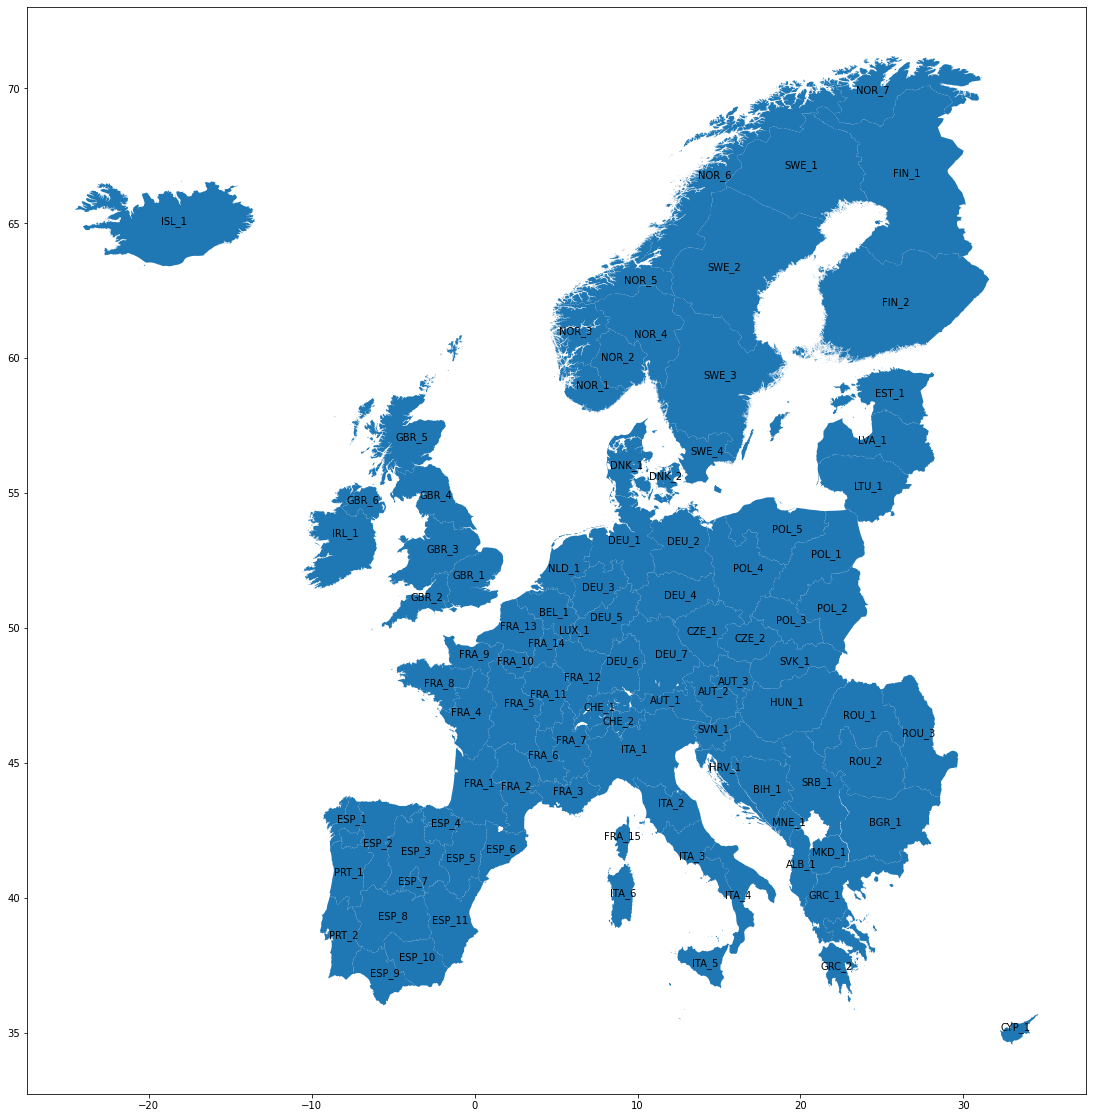

In [131]:
units.plot(figsize=(20, 20))
units['coords'] = units['geometry'].apply(lambda x: x.representative_point().coords[:])
units['coords'] = [coords[0] for coords in units['coords']]
for idx, row in units.iterrows():
    plt.annotate(s=row['id'], xy=row['coords'],
                 horizontalalignment='center')

In [138]:
foo = pd.read_csv('../data/transmission.csv', index_col=[0, 1, 2, 3, 4])['value'].squeeze()
foo.index[foo.index.duplicated()]

MultiIndex([('DEU_1', 'DEU_6', 'dc', 'OHL', 'two-way')],
           names=['from', 'to', 'current', 'type', 'direction'])